Yfinance

In [39]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import mplfinance as mpf
import pandas_ta as ta
import numpy as np

In [40]:
#choose stock with tickers
tickerAAPL = yf.Ticker("AAPL")

# tickerAAPL.news -> gives us a json back with urls to all the yahoo finance articles related to the ticker AAPL
# we come back to this part when we do sentiment analysis 
# this will be one of the few ways we can get news about a specific stock

In [41]:
# get historical market data
# params 
""" period: data period to download (either use period parameter or use start and end) Valid periods are:
“1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”
interval: data interval (1m data is only for available for last 7 days, and data interval <1d for the last 60 days) Valid intervals are:
“1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”
start: If not using period – in the format (yyyy-mm-dd) or datetime.
end: If not using period – in the format (yyyy-mm-dd) or datetime. """

# data source one : dataframe yahoo finance = dfyf
dfyf = yf.download("AAPL", period="max")
dfyf.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600


In [42]:
# data source two : found on github = dfcustom
dfcustom = pd.read_csv('AAPL.csv')
dfcustom.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MA50
0,1980-12-12,0.0998,0.1002,0.0998,0.0998,469.034,NaN
1,1980-12-15,0.0951,0.0951,0.0946,0.0946,175.885,NaN
2,1980-12-16,0.0881,0.0881,0.0877,0.0877,105.728,NaN
3,1980-12-17,0.0898,0.0903,0.0898,0.0898,86.442,NaN
4,1980-12-18,0.0925,0.0929,0.0925,0.0925,73.450,NaN


In [43]:
# table[(table.column_name == some_value) | (table.column_name2 == some_value2)]
dfcustom[dfcustom.DATE == '2023-07-06']

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MA50
10728,2023-07-06,189.84,192.02,189.2,191.81,44.995,178.116


In [44]:
# data source three : alpha vantage api calls = dfav
# https://www.alphavantage.co/documentation/#time-series-data


APIKEY = "XIBTEAC0WWX5ONGP"
ts = TimeSeries(APIKEY, output_format='pandas')
dfav, meta = ts.get_intraday('AAPL', interval='5min', outputsize='full')
dfavdaily, metaaaplday = ts.get_daily('AAPL', outputsize='full')
dfavdaily.sort_values(by='date', ascending = True, inplace=True)




KeyboardInterrupt: 

In [ ]:
dfav.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-07-07 04:20:00,191.52,191.58,191.43,191.50,584.0
2023-07-07 04:15:00,191.41,191.54,191.37,191.51,1689.0
2023-07-07 04:10:00,191.32,191.43,191.31,191.40,1454.0
2023-07-07 04:05:00,191.38,191.46,191.30,191.32,1462.0
2023-07-07 04:00:00,191.81,192.46,191.26,191.41,7479.0


In [ ]:
dfav.head()
dfav.sort_values(by='date', ascending = True, inplace=True)

In this part we will compare the three datasets and see if they are similar

In [ ]:
# dfyf.info() # DatetimeIndex: 10751 entries, 1980-12-12 to 2023-08-04
# dfcustom.info() # RangeIndex: 10750 entries, 0 to 10749 -> needs to be changed
# dfavdaily.info() # DatetimeIndex: 5978 entries, 2023-08-04 to 1999-11-01
dfcustom.set_index(pd.to_datetime(dfcustom['DATE']), inplace=True)
dfcustom.drop(axis=1, columns=['DATE'], inplace=True)

In [ ]:
dfcustom.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME,MA50
DATE,,,,,,
1980-12-12,0.0998,0.1002,0.0998,0.0998,469.034,NaN
1980-12-15,0.0951,0.0951,0.0946,0.0946,175.885,NaN
1980-12-16,0.0881,0.0881,0.0877,0.0877,105.728,NaN
1980-12-17,0.0898,0.0903,0.0898,0.0898,86.442,NaN
1980-12-18,0.0925,0.0929,0.0925,0.0925,73.450,NaN


In [ ]:
randomstartdate= '2022-02-14'
randomenddate = '2022-03-14'
dfyftemp = dfyf.copy()
dfyftemp = dfyftemp[randomstartdate : randomenddate]

dfcustomtemp = dfcustom.copy()
dfcustomtemp = dfcustomtemp[randomstartdate : randomenddate]

dfavtemp = dfavdaily.copy()
dfavtemp = dfavtemp[randomstartdate : randomenddate]

In [ ]:
dfyftemp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-14,167.369995,169.580002,166.559998,168.880005,167.631287,86185500
2022-02-15,170.970001,172.949997,170.250000,172.789993,171.512344,62527400
2022-02-16,171.850006,173.339996,170.050003,172.550003,171.274124,61177400
2022-02-17,171.029999,171.910004,168.470001,168.880005,167.631287,69589300
2022-02-18,169.820007,170.539993,166.190002,167.300003,166.062958,82772700


In [ ]:
dfcustomtemp.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME,MA50
DATE,,,,,,
2022-02-14,166.1321,168.3257,165.3281,167.6309,85.988,170.838
2022-02-15,169.7055,171.6708,168.9908,171.5120,62.468,171.060
2022-02-16,170.5790,172.0579,168.7923,171.2738,61.078,171.208
2022-02-17,169.7650,170.6385,167.2240,167.6309,69.230,171.166
2022-02-18,168.5640,169.2799,164.9608,166.0626,82.773,171.016


In [ ]:
dfavtemp.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-02-14,167.37,169.5800,166.56,168.88,86185530.0
2022-02-15,170.97,172.9500,170.25,172.79,64286320.0
2022-02-16,171.85,173.3400,170.05,172.55,61177398.0
2022-02-17,171.03,171.9100,168.47,168.88,69589344.0
2022-02-18,169.82,170.5413,166.19,167.30,82772674.0


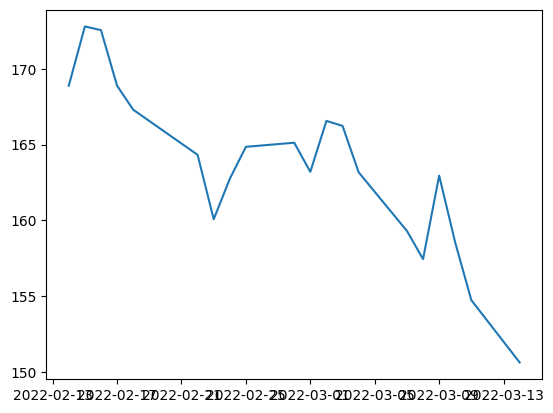

In [ ]:
plt.plot(dfavtemp['4. close'])

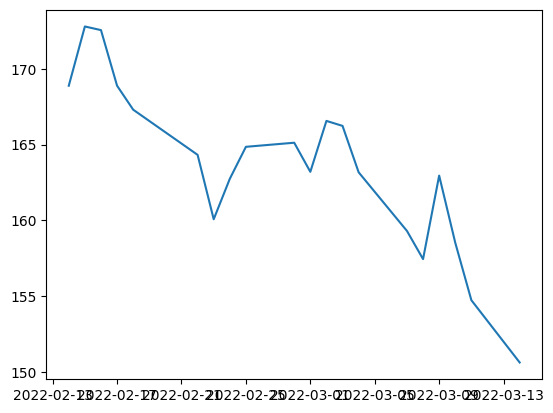

In [ ]:
plt.plot(dfyftemp['Close'])

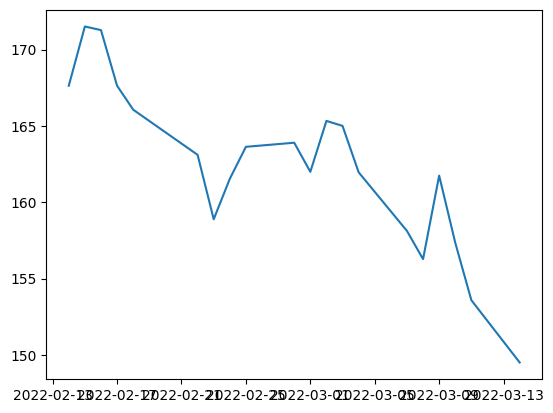

In [ ]:
plt.plot(dfcustomtemp['CLOSE'])

WE can see that all three of them are pretty similar except the custom one which has different prices but that can be solved with normalization as the graphs look pretty similar, but even then I think it's best if i continue with yahoo finance and alpha vantage 
for the sake of being accurate

In [ ]:
# lets rename the columns of the two data sets
dfyf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600


In [ ]:
#dfavdaily.rename(columns={'1.open': 'Open', '2.high': 'High', '3.low': 'low', '4.close': 'Close', '5.volume': 'Volume'}, inplace=True)
# the code above didnt work no idea why even tho inplace was set to true 

columns = ['Open', 'High', 'Low', 'Close', 'Volume']
dfavdaily.columns = columns
dfav.columns = columns

Now for intraday trading we don't just have one datapoint per day but multiple (1min,5min,15min etc) so perhaps it can be interesting to keep the minimum and maximum price for each day in a separate column. Also it might be beneficial to know when the markets open and close during the day. 
'The regular trading hours for the U.S. stock market, which includes the Nasdaq Stock Market (Nasdaq) and the New York Stock Exchange (NYSE), are 9:30 a.m. to 4 p.m., except on stock market holidays. ' 
Source: https://www.kiplinger.com/investing/602886/stock-market-trading-hours. 
This is good for us since AlphaVantage gives us datapoints from 4am till 8pm Eastern Time for the US market.
Source: https://www.alphavantage.co/documentation/#time-series-data

In [ ]:
dfav = dfav['2023-08-04-09':]

Now would be the best to calculate the minimum and maximum and create a new temporari df with the active trading hours only.

In [ ]:
dfactive = dfav.between_time('9:30', '16:00')

In [ ]:
dfactive.head()

,Open,High,Low,Close,Volume
date,,,,,
2023-08-04 09:30:00,185.52,185.530,183.25,185.000,8613039.0
2023-08-04 09:35:00,185.00,187.380,184.98,187.123,4515023.0
2023-08-04 09:40:00,187.13,187.310,185.02,185.340,3684635.0
2023-08-04 09:45:00,185.33,187.140,184.91,185.915,3468902.0
2023-08-04 09:50:00,185.94,185.995,185.03,185.080,2097396.0


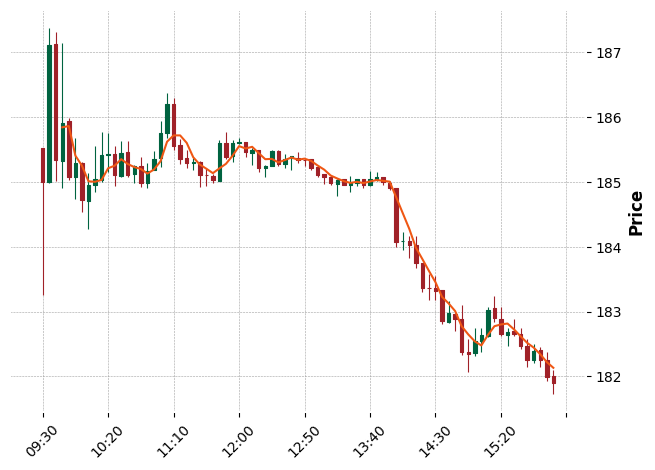

In [ ]:
#with a moving average of 4
#https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb
#adding the charles value to the styles attribute makes the candles red and green
mpf.plot(dfactive,type='candle',style='charles',mav=4)

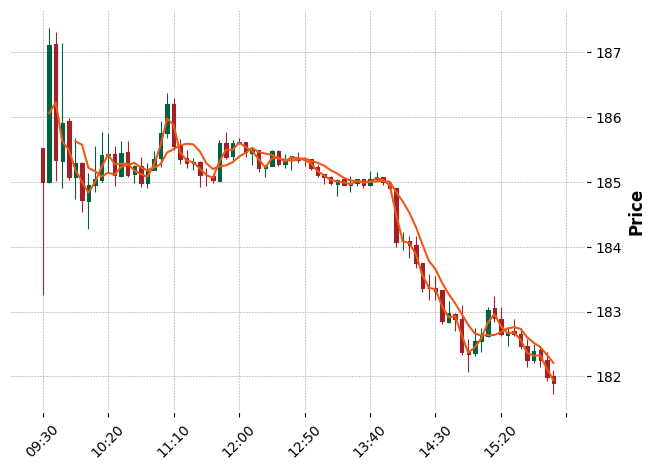

In [ ]:
# here I've plotted the same chart but with two different mav like Dirk (previous promotor) told me
# eg one thats 20 and one thats 60
# edit: as 20 and 60 dind't quite work ive divided them by 10 so they'd keep their initial scale 
# i've to look up more into mav and also read https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp
mpf.plot(dfactive,type='candle',style='charles',mav=(2,6))

In [ ]:
dfactive.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [ ]:
dfactive['2-day'] = dfactive.ta.sma(2)
dfactive['6-day'] = dfactive.ta.sma(6)

C:\Users\ali\AppData\Local\Temp\ipykernel_9112\3341463377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfactive['2-day'] = dfactive.ta.sma(2)
C:\Users\ali\AppData\Local\Temp\ipykernel_9112\3341463377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfactive['6-day'] = dfactive.ta.sma(6)


In [ ]:
dfactive.head(6)

,Open,High,Low,Close,Volume,2-day,6-day
date,,,,,,,
2023-08-04 09:30:00,185.52,185.530,183.250,185.000,8613039.0,NaN,NaN
2023-08-04 09:35:00,185.00,187.380,184.980,187.123,4515023.0,186.0615,NaN
2023-08-04 09:40:00,187.13,187.310,185.020,185.340,3684635.0,186.2315,NaN
2023-08-04 09:45:00,185.33,187.140,184.910,185.915,3468902.0,185.6275,NaN
2023-08-04 09:50:00,185.94,185.995,185.030,185.080,2097396.0,185.4975,NaN
2023-08-04 09:55:00,185.08,185.680,184.745,185.295,2766809.0,185.1875,185.6255


In [ ]:
dfactive['signal'] = np.where(dfactive['2-day'] > dfactive['6-day'], 1, 0)
dfactive['signal'] = np.where(dfactive['2-day'] < dfactive['6-day'], -1, dfactive['signal'] )
dfactive.dropna(inplace=True)


C:\Users\ali\AppData\Local\Temp\ipykernel_9112\1948169751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfactive['signal'] = np.where(dfactive['2-day'] > dfactive['6-day'], 1, 0)
C:\Users\ali\AppData\Local\Temp\ipykernel_9112\1948169751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfactive['signal'] = np.where(dfactive['2-day'] < dfactive['6-day'], -1, dfactive['signal'] )
C:\Users\ali\AppData\Local\Temp\ipykernel_9112\1948169751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a c

In [ ]:
dfactive['return'] = np.log(dfactive['Close']).diff()
dfactive['system_return'] = dfactive['signal'] * dfactive['return']
# Calculate Returns and append to the df DataFrame
dfactive.ta.log_return(cumulative=True, append=True)
dfactive.ta.percent_return(cumulative=True, append=True)

dfactive['entry'] = dfactive.signal.diff()

C:\Users\ali\AppData\Local\Temp\ipykernel_9112\85277163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfactive['return'] = np.log(dfactive['Close']).diff()
C:\Users\ali\AppData\Local\Temp\ipykernel_9112\85277163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfactive['system_return'] = dfactive['signal'] * dfactive['return']
C:\Users\ali\AppData\Local\Temp\ipykernel_9112\85277163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [1]:
dfactive.head()

NameError: name 'dfactive' is not defined

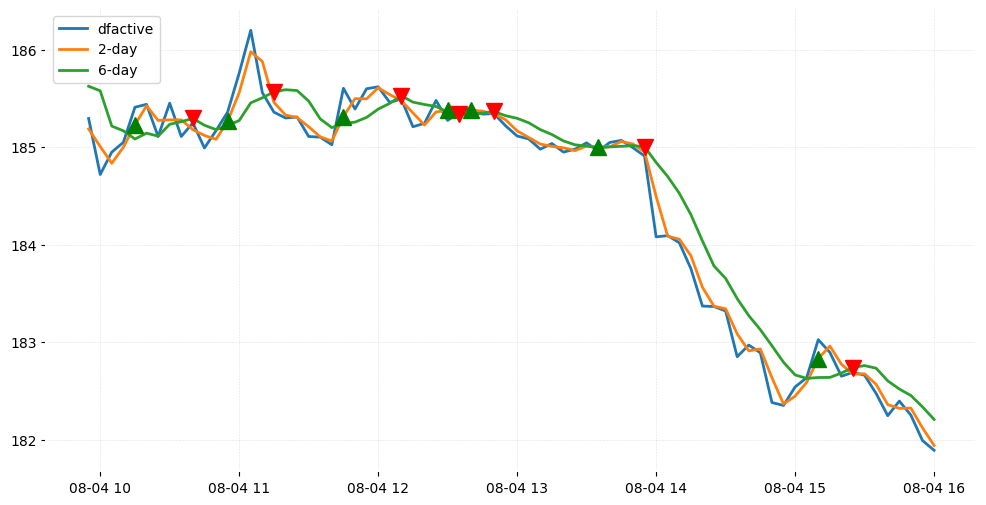

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(dfactive.iloc[-252:]['Close'], label = 'dfactive')
plt.plot(dfactive.iloc[-252:]['2-day'], label = '2-day')
plt.plot(dfactive.iloc[-252:]['6-day'], label = '6-day')
plt.plot(dfactive[-252:].loc[dfactive.entry == 2].index, dfactive[-252:]['2-day'][dfactive.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(dfactive[-252:].loc[dfactive.entry == -2].index, dfactive[-252:]['6-day'][dfactive.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

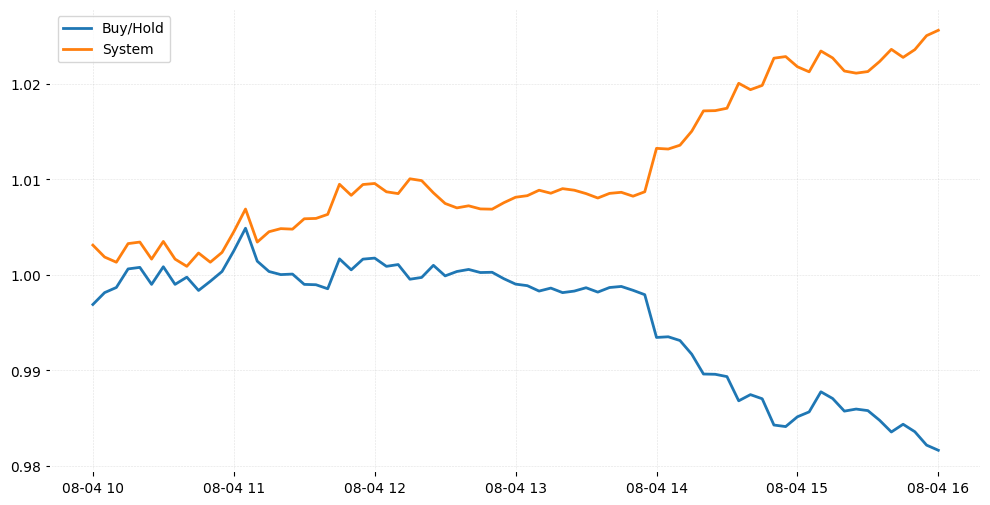

In [ ]:
plt.plot(np.exp(dfactive['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(dfactive['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [ ]:
import datetime as dt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tenserflow.keras.models import Sequential



,Open,High,Low,Close,Volume,2-day,6-day,signal,return,system_return,CUMLOGRET_1,CUMPCTRET_1,entry
date,,,,,,,,,,,,,
2023-08-04 09:55:00,185.080,185.68,184.745,185.295,2766809.0,185.1875,185.625500,-1,NaN,NaN,0.000000,0.000000,NaN
2023-08-04 10:00:00,185.300,185.31,184.540,184.720,2022276.0,185.0075,185.578833,-1,-0.003108,0.003108,-0.003108,-0.003103,0.0
2023-08-04 10:05:00,184.710,185.14,184.270,184.950,2308703.0,184.8350,185.216667,-1,0.001244,-0.001244,-0.001864,-0.001862,0.0
2023-08-04 10:10:00,184.950,185.56,184.840,185.050,1621517.0,185.0000,185.168333,-1,0.000541,-0.000541,-0.001323,-0.001322,0.0
2023-08-04 10:15:00,185.035,185.77,185.000,185.410,1453771.0,185.2300,185.084167,1,0.001944,0.001944,0.000620,0.000621,2.0
